In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-eligible-dataset/loan-train.csv
/kaggle/input/loan-eligible-dataset/loan-test.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Loading:

In [4]:
dataset=pd.read_csv('/kaggle/input/loan-eligible-dataset/loan-train.csv')

In [5]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataset.shape

(614, 13)

In [8]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Descriptive Statistics: 

In [9]:
dataset.describe() #Display statistical information of date

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## EDA (Expodatary Data Analysis):

In [10]:
def explore_object_type(df ,feature_name):

    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [11]:
# Now, Test and Call a function for gender only
explore_object_type(dataset, 'Gender')

Gender
Male      489
Female    112
Name: count, dtype: int64


In [12]:
dataset_columns = dataset.columns # assign to a variable
for featureName in dataset_columns:
    if dataset[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(dataset, str(featureName))


"Loan_ID's" Values with count are :
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

"Gender's" Values with count are :
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's" Values with count are :
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's" Values with count are :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's" Values with count are :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's" Values with count are :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's" Values with count are :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's" Values with count are :
Loan_Status
Y    422
N    192
Name: count, dtype: int64


## Feature Engineering:

In [13]:
#Fill missing values with mode because categorical features
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)

/tmp/ipykernel_33/2967467422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_33/2967467422.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [14]:
#Fill missing values with mean because numerical features
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean(), inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mean(), inplace=True)


/tmp/ipykernel_33/1944942697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)
/tmp/ipykernel_33/1944942697.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [15]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

## Data visualization:

In [17]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


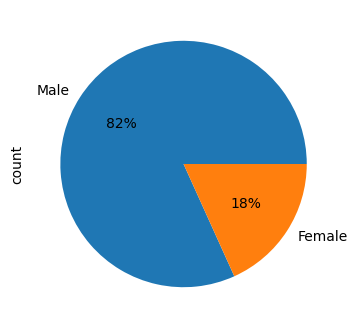

In [18]:
plt.figure(figsize=(10,4))
dataset.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show();


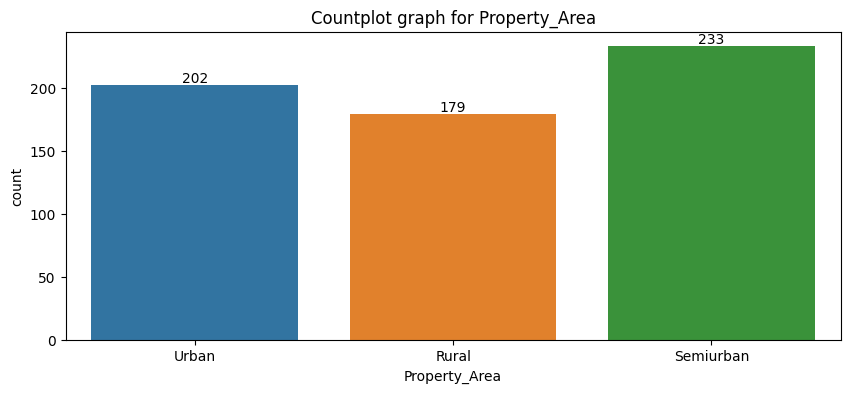

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax = sns.countplot(x='Property_Area', data=dataset)
plt.title(f'Countplot graph for Property_Area')
ax.bar_label(ax.containers[0])
plt.show();

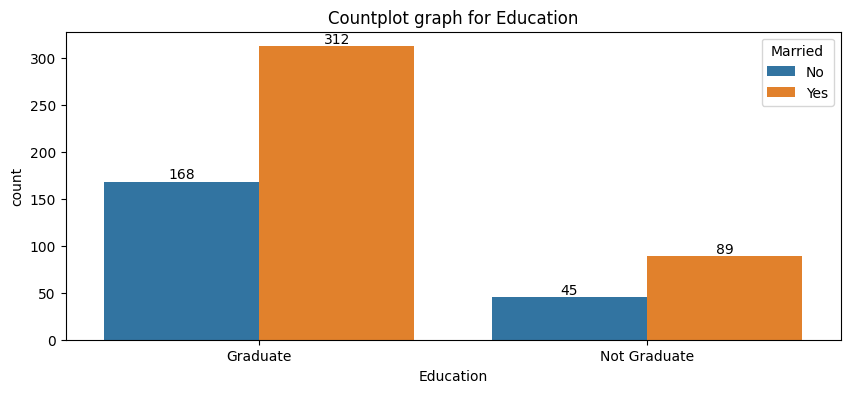

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))  
ax = sns.countplot(x='Education', hue='Married', data=dataset)
plt.title(f'Countplot graph for Education')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show();

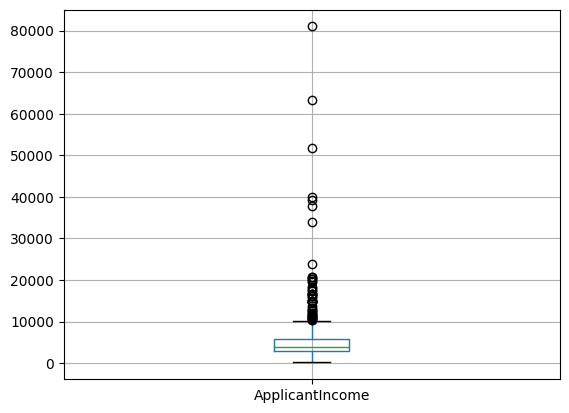

In [21]:
dataset.boxplot(column='ApplicantIncome');

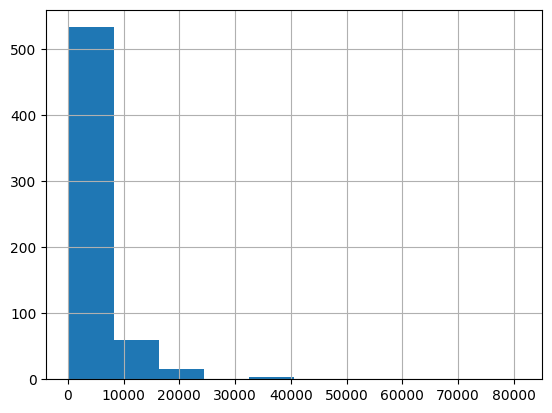

In [22]:
dataset['ApplicantIncome'].hist(bins=10);

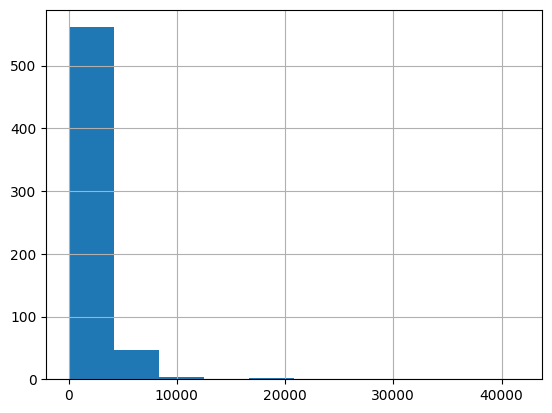

In [23]:
dataset['CoapplicantIncome'].hist(bins=10);

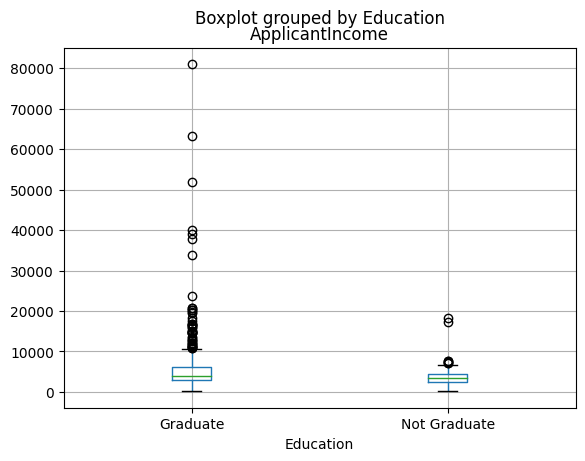

In [24]:
dataset.boxplot(column='ApplicantIncome', by='Education');

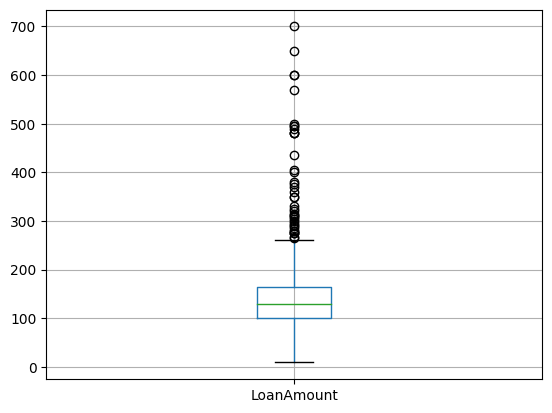

In [25]:
dataset.boxplot(column='LoanAmount');

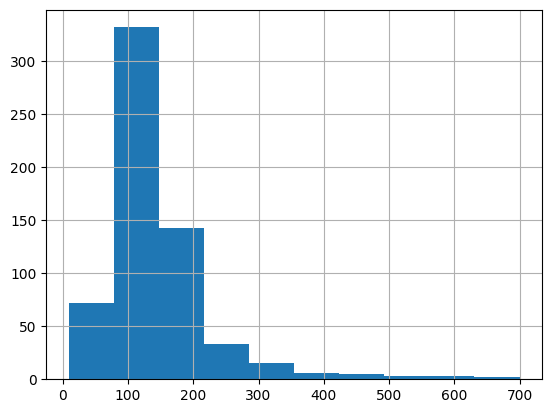

In [26]:
dataset['LoanAmount'].hist(bins=10);

In [27]:
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])

<Axes: >

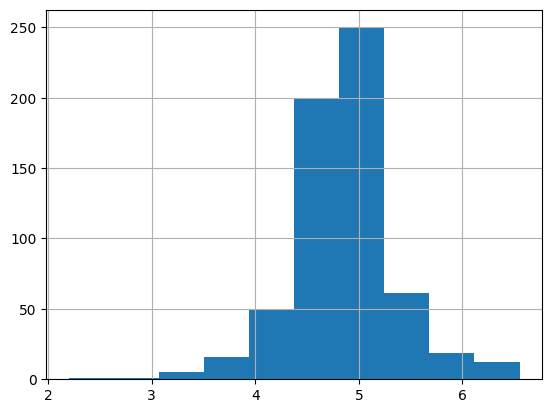

In [28]:
dataset['LoanAmount_log'].hist(bins=10)

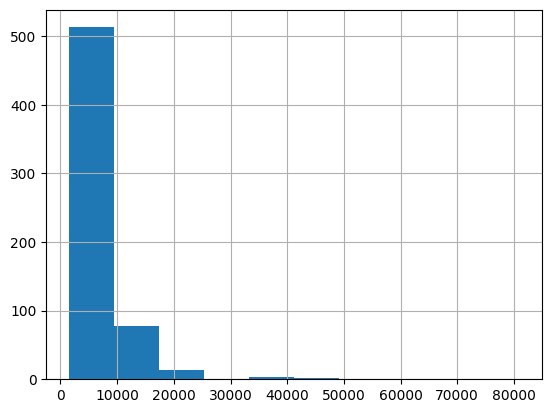

In [29]:
dataset['TotalIncome'].hist(bins=10);

In [30]:
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])

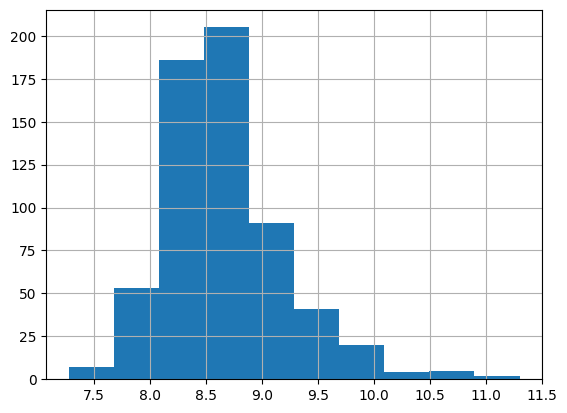

In [31]:
dataset['TotalIncome_log'].hist(bins=10);

## Plot PairPlot:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

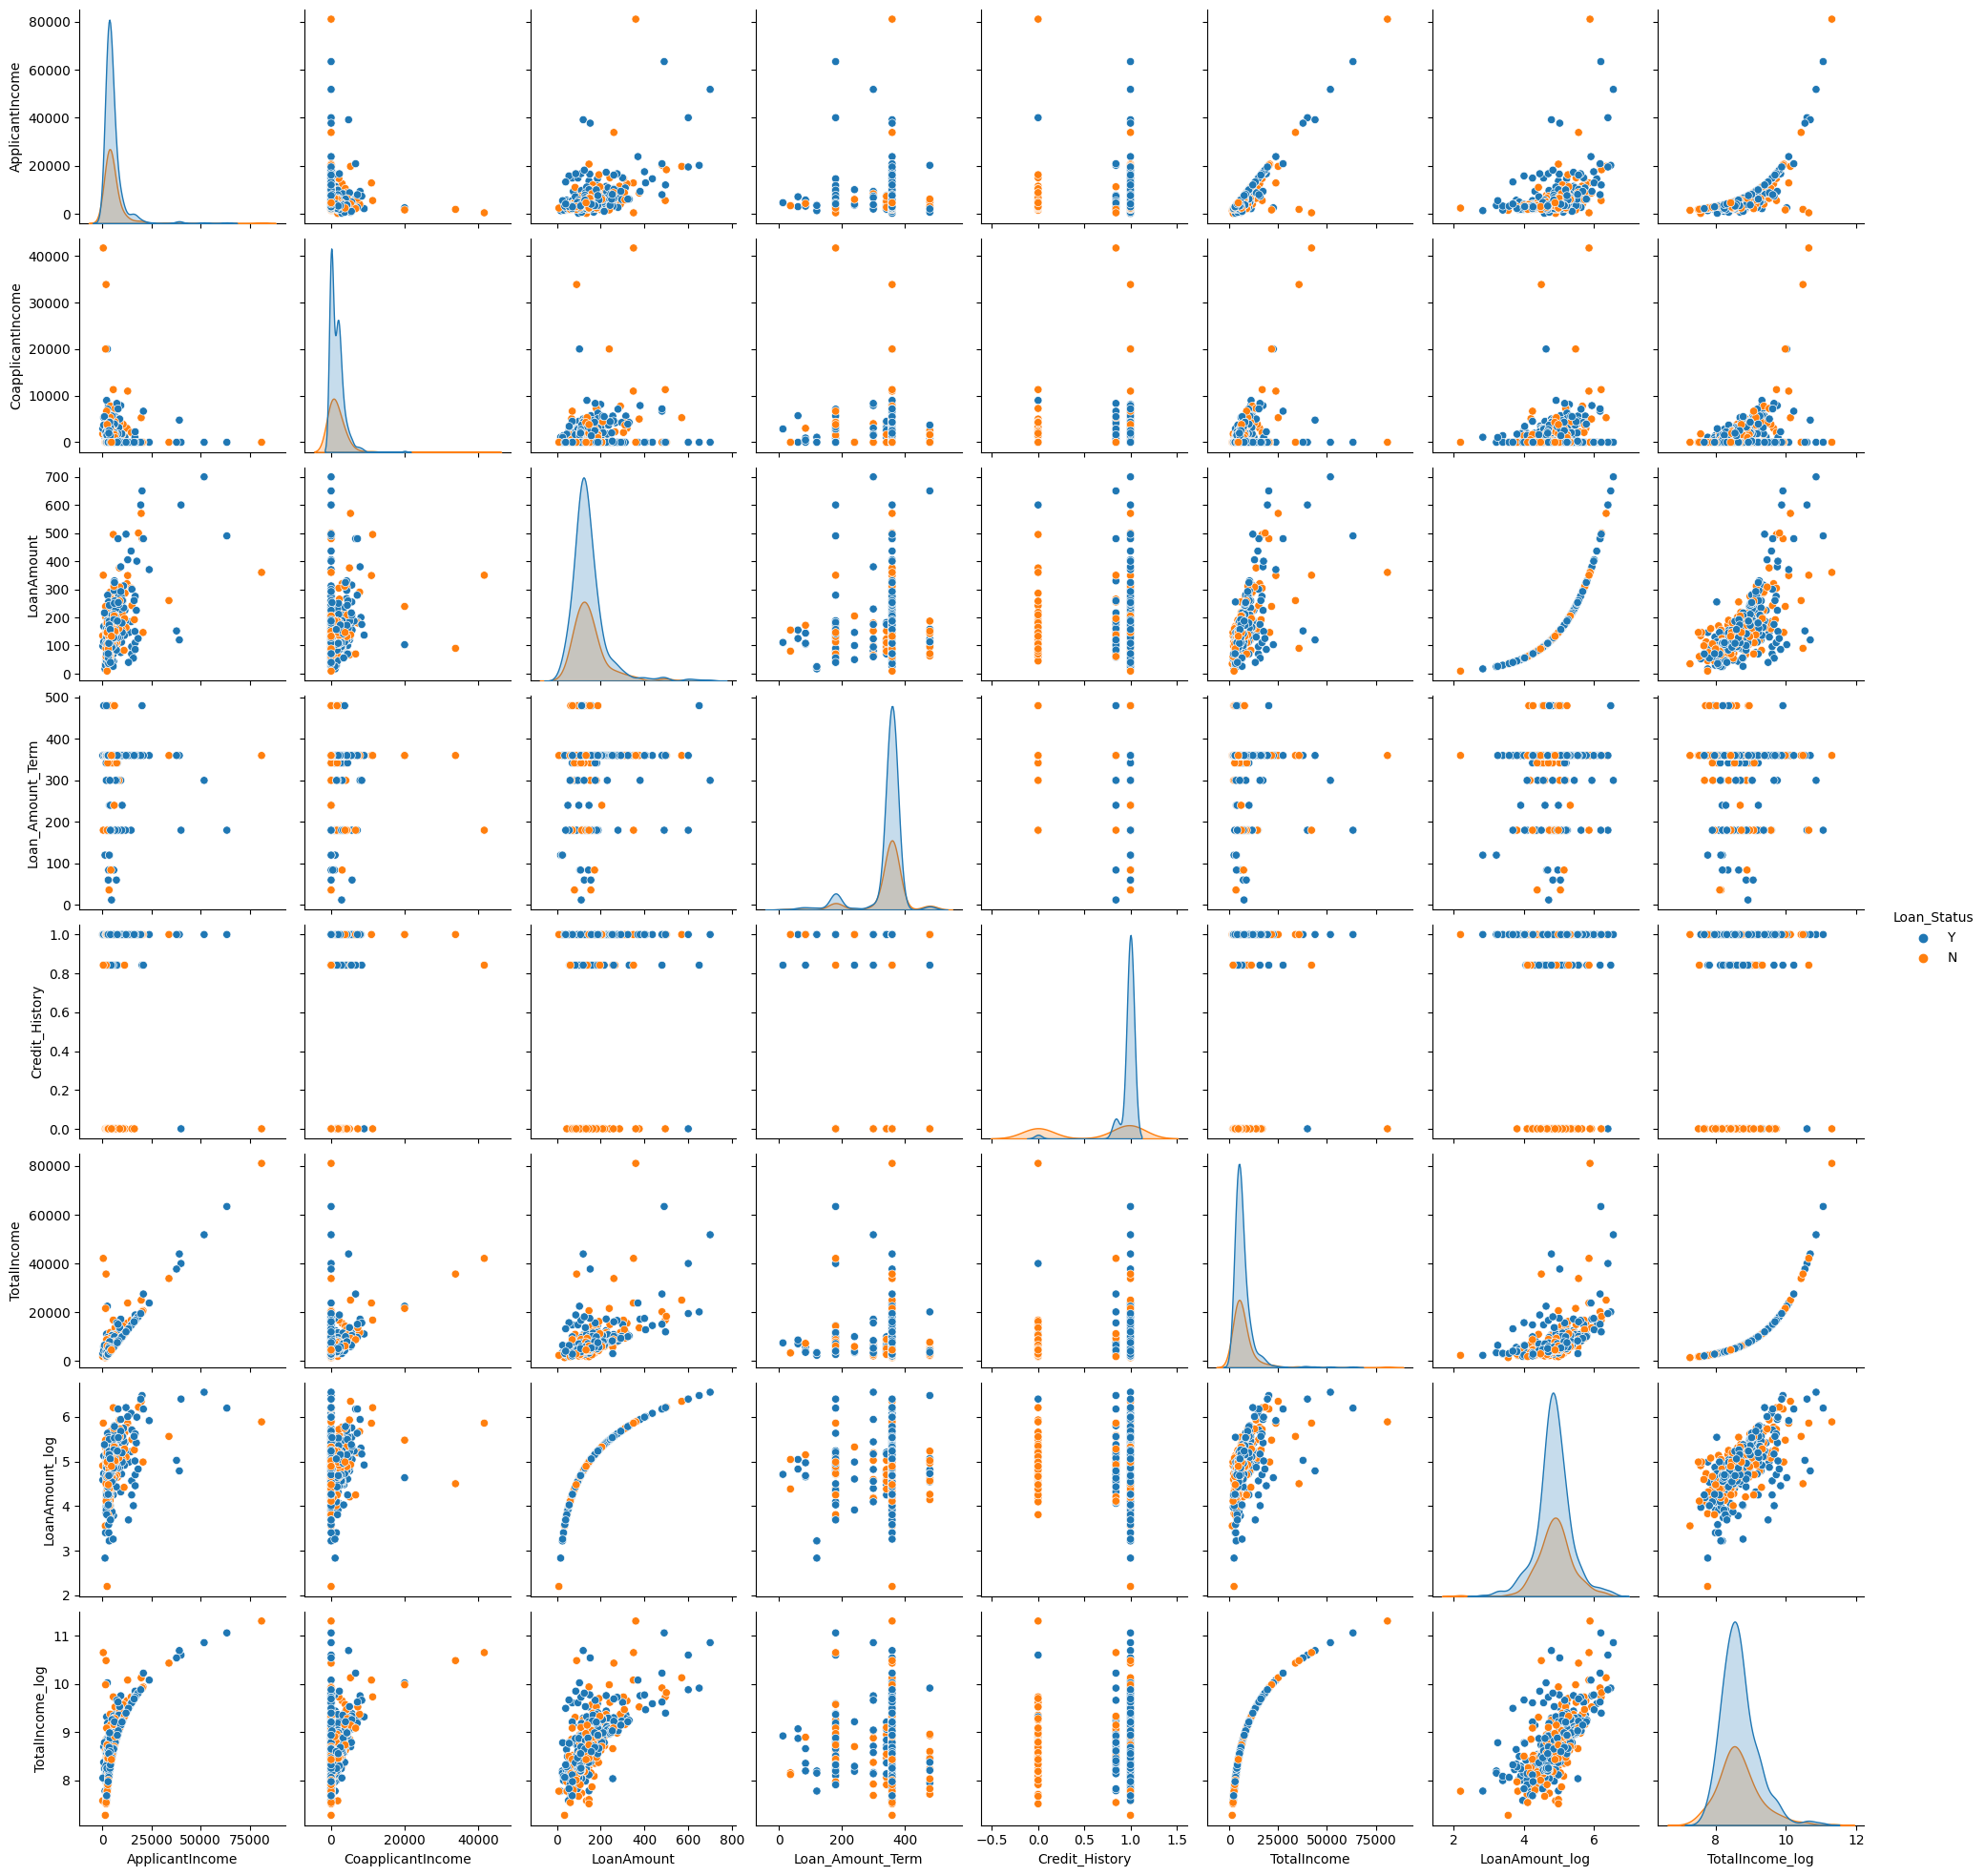

In [32]:
#show all the relation and the correlation beetween features
sns.pairplot(dataset,hue='Loan_Status')
plt.show();

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
 14  LoanAmount_log     614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [73]:
df = dataset.iloc[:,np.r_[1:6,9:15]]

In [74]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,5849.0,4.986426
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,6091.0,4.852030


## Text Preprocessing:

In [75]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [76]:
df_columns = df.columns
for featureName in df_columns:
    if df[featureName].dtype == 'object':
        df[featureName] = le.fit_transform(df[featureName])

/tmp/ipykernel_33/119686533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[featureName] = le.fit_transform(df[featureName])
/tmp/ipykernel_33/119686533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[featureName] = le.fit_transform(df[featureName])
/tmp/ipykernel_33/119686533.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [77]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_log
0,1,0,0,0,0,360.0,1.0,2,1,5849.0,4.986426
1,1,1,1,0,0,360.0,1.0,0,0,6091.0,4.852030
2,1,1,0,0,1,360.0,1.0,2,1,3000.0,4.189655
3,1,1,0,1,0,360.0,1.0,2,1,4941.0,4.787492
4,1,0,0,0,0,360.0,1.0,2,1,6000.0,4.948760


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Property_Area     614 non-null    int64  
 8   Loan_Status       614 non-null    int64  
 9   TotalIncome       614 non-null    float64
 10  LoanAmount_log    614 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 52.9 KB


## Create X (predictor ) and y (target) variable:

In [79]:
X = df.drop('Loan_Status', axis=1)
y= df['Loan_Status']

## Split the data into test and train:

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

## Model Building:

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)

In [82]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [83]:
y_pred = dtc.predict(X_test)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.64      0.51        33
           1       0.84      0.68      0.75        90

    accuracy                           0.67       123
   macro avg       0.63      0.66      0.63       123
weighted avg       0.72      0.67      0.68       123



In [85]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [86]:
gnb.fit(X_train, y_train)

GaussianNB()

In [87]:
y_pred_gnb = gnb.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [106]:
test_data = pd.read_csv('/kaggle/input/loan-eligible-dataset/loan-test.csv')
test_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [107]:
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

In [108]:
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

In [109]:
test_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,4.836282


In [110]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
TotalIncome           0
LoanAmount_log        5
dtype: int64

In [111]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  TotalIncome        367 non-null    int64  
 13  LoanAmount_log     362 non-null    float64
dtypes: float64(4), int64(3), object(7)
memory usage: 40.3+ KB


In [115]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)

In [116]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(), inplace=True)
test_data['LoanAmount_log'].fillna(test_data['LoanAmount_log'].mean(), inplace=True)

In [117]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
LoanAmount_log       0
dtype: int64

In [125]:
df_test = test_data.iloc[:,np.r_[1:6,9:14]]

In [126]:
df_test_columns = df_test.columns
for FeatureColumns in df_test_columns:
    if df_test[FeatureColumns].dtype == 'object':
        df_test[FeatureColumns] = le.fit_transform(df_test[FeatureColumns])

/tmp/ipykernel_33/3928524302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[FeatureColumns] = le.fit_transform(df_test[FeatureColumns])
/tmp/ipykernel_33/3928524302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[FeatureColumns] = le.fit_transform(df_test[FeatureColumns])
/tmp/ipykernel_33/3928524302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [127]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_log
0,1,1,0,0,0,360.0,1.000000,2,5720,4.700480
1,1,1,1,0,0,360.0,1.000000,2,4576,4.836282
2,1,1,2,0,0,360.0,1.000000,2,6800,5.337538
3,1,1,2,0,0,360.0,0.825444,2,4886,4.605170
4,1,0,0,1,0,360.0,1.000000,2,3276,4.356709


In [133]:
y_pred_test = gnb.predict(df_test)

In [134]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,